In [27]:
# data manipulation
# conda install -c conda-forge pandas
import pandas as pd
# conda install -c conda-forge numpy
import numpy as np
# conda install -c conda-forge openpyxl
import openpyxl
# conda install -c conda-forge missingno
import missingno as msno
import os
import glob


In [28]:
os.getcwd()

'c:\\Users\\kmedr\\My Drive\\Projects\\omdenasa_muv'

In [29]:
file_list = os.path.join("C:/Users/kmedr/My Drive/Projects/omdenasa_muv/merge_data", "*.csv")
file_list = glob.glob(file_list)

In [34]:
df_crime_rate = pd.concat([pd.read_csv(f) for f in file_list ], ignore_index=True)
df_crime_rate

,Reported Date,Suburb - Incident,Postcode - Incident,Offence Level 1 Description,Offence Level 2 Description,Offence Level 3 Description,Offence count
0,1/07/2010,ADELAIDE,5000,OFFENCES AGAINST PROPERTY,FRAUD DECEPTION AND RELATED OFFENCES,Obtain benefit by deception,2.0
1,1/07/2010,ADELAIDE,5000,OFFENCES AGAINST PROPERTY,PROPERTY DAMAGE AND ENVIRONMENTAL,Other property damage and environmental,2.0
2,1/07/2010,ADELAIDE,5000,OFFENCES AGAINST PROPERTY,SERIOUS CRIMINAL TRESPASS,SCT - Non Residence,1.0
3,1/07/2010,ADELAIDE,5000,OFFENCES AGAINST PROPERTY,THEFT AND RELATED OFFENCES,Other theft,6.0
4,1/07/2010,ADELAIDE,5000,OFFENCES AGAINST PROPERTY,THEFT AND RELATED OFFENCES,Theft from shop,3.0
...,...,...,...,...,...,...,...
1121729,30/06/2022,WILLASTON,5118,OFFENCES AGAINST THE PERSON,ACTS INTENDED TO CAUSE INJURY,Serious Assault resulting in injury,1.0
1121730,30/06/2022,WOODCROFT,5162,OFFENCES AGAINST PROPERTY,THEFT AND RELATED OFFENCES,Theft from motor vehicle,1.0
1121731,30/06/2022,WOODVILLE NORTH,5012,OFFENCES AGAINST PROPERTY,THEFT AND RELATED OFFENCES,Other theft,1.0
1121732,30/06/2022,NaN,NaN,OFFENCES AGAINST PROPERTY,FRAUD DECEPTION AND RELATED OFFENCES,Obtain benefit by deception,4.0


In [81]:
df_crime_rate

,Reported Date,Suburb - Incident,Postcode - Incident,Offence Level 1 Description,Offence Level 2 Description,Offence Level 3 Description,Offence count
0,1/07/2010,ADELAIDE,5000,OFFENCES AGAINST PROPERTY,FRAUD DECEPTION AND RELATED OFFENCES,Obtain benefit by deception,2.0
1,1/07/2010,ADELAIDE,5000,OFFENCES AGAINST PROPERTY,PROPERTY DAMAGE AND ENVIRONMENTAL,Other property damage and environmental,2.0
2,1/07/2010,ADELAIDE,5000,OFFENCES AGAINST PROPERTY,SERIOUS CRIMINAL TRESPASS,SCT - Non Residence,1.0
3,1/07/2010,ADELAIDE,5000,OFFENCES AGAINST PROPERTY,THEFT AND RELATED OFFENCES,Other theft,6.0
4,1/07/2010,ADELAIDE,5000,OFFENCES AGAINST PROPERTY,THEFT AND RELATED OFFENCES,Theft from shop,3.0
...,...,...,...,...,...,...,...
1116588,30/06/2022,WHYALLA STUART,5608,OFFENCES AGAINST PROPERTY,SERIOUS CRIMINAL TRESPASS,Other unlawful entry with intent,1.0
1116589,30/06/2022,WILLASTON,5118,OFFENCES AGAINST PROPERTY,PROPERTY DAMAGE AND ENVIRONMENTAL,Other property damage and environmental,1.0
1116590,30/06/2022,WILLASTON,5118,OFFENCES AGAINST THE PERSON,ACTS INTENDED TO CAUSE INJURY,Serious Assault resulting in injury,1.0
1116591,30/06/2022,WOODCROFT,5162,OFFENCES AGAINST PROPERTY,THEFT AND RELATED OFFENCES,Theft from motor vehicle,1.0


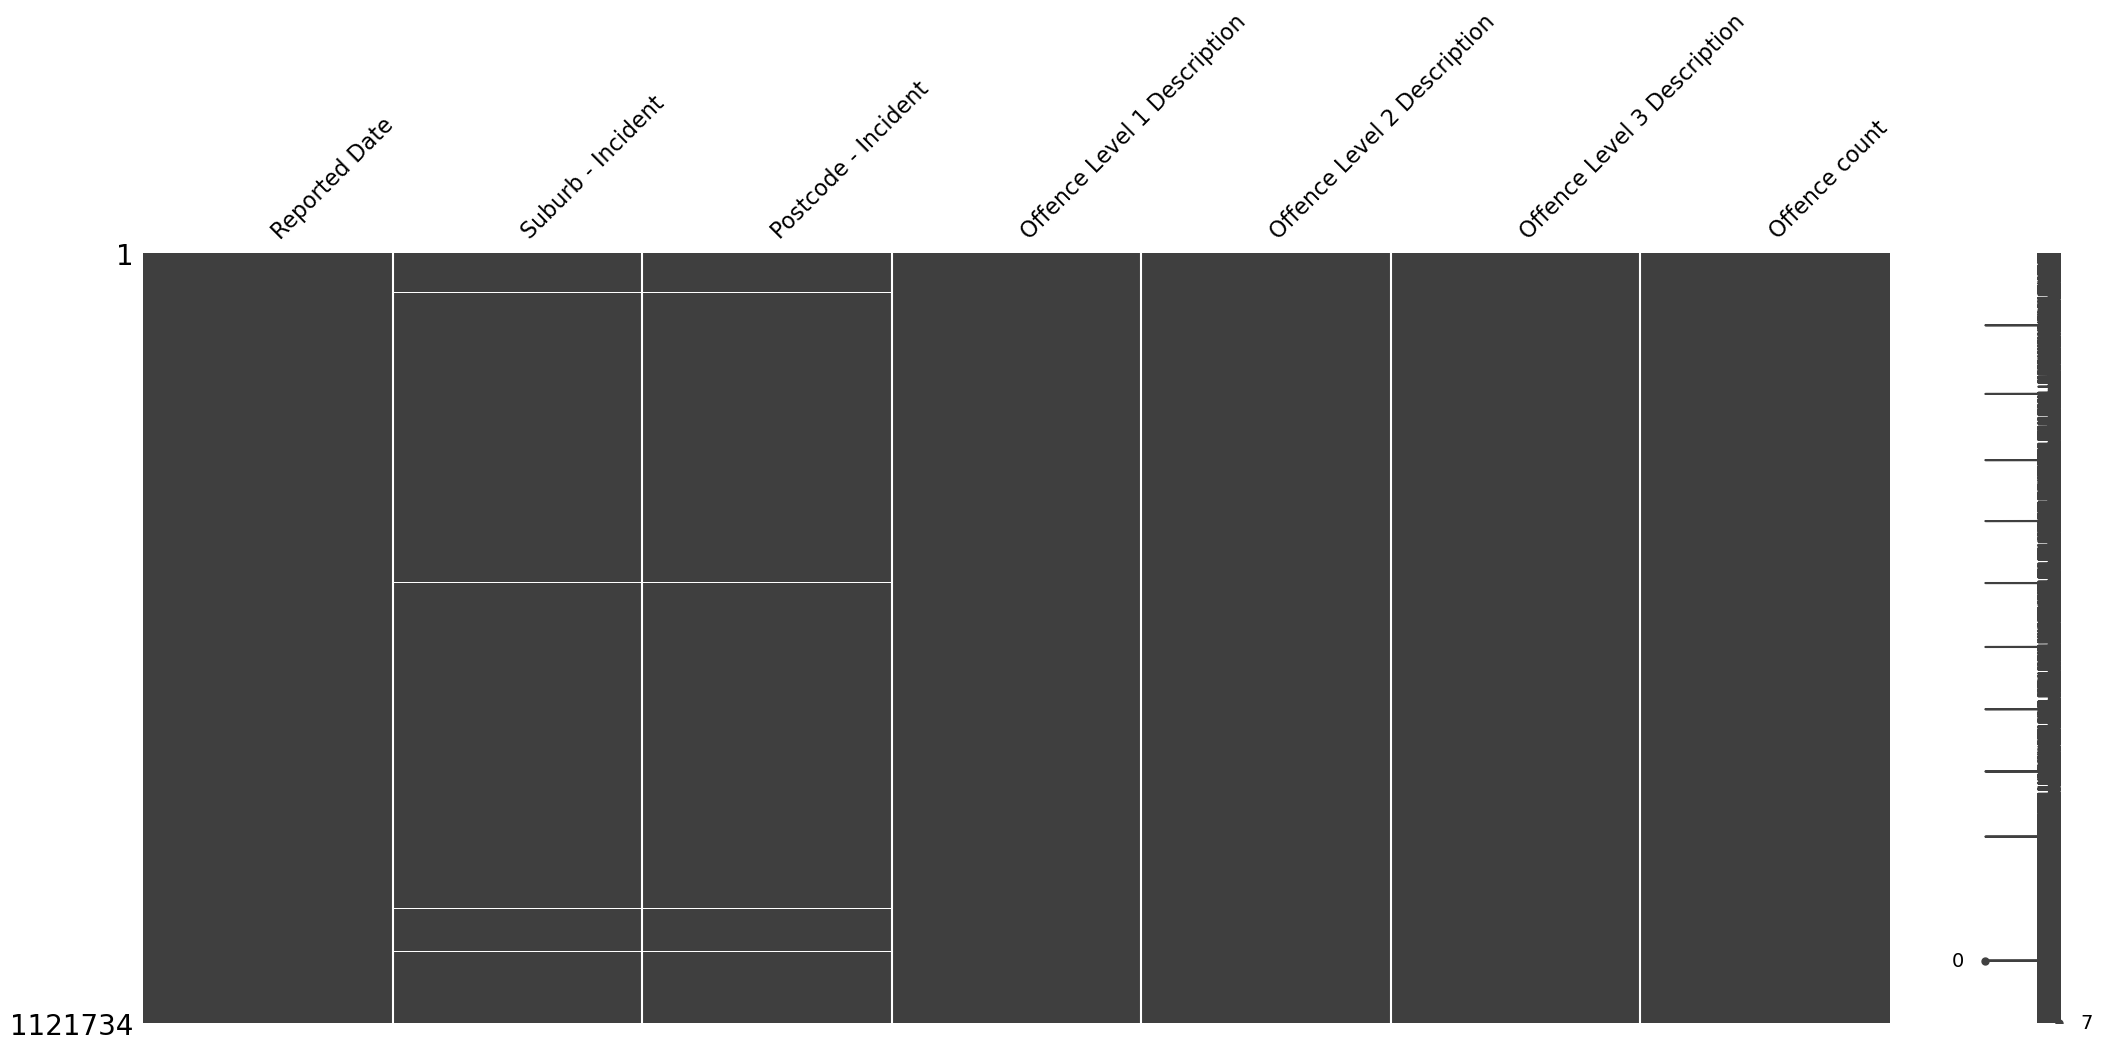

In [35]:
msno.matrix(df_crime_rate);

In [32]:
df_crime_rate.isnull().sum().sort_values(ascending=False)

Postcode - Incident            5088
Suburb - Incident              3090
Reported Date                    10
Offence Level 1 Description      10
Offence Level 2 Description      10
Offence Level 3 Description      10
Offence count                    10
dtype: int64

In [37]:
print(
    'We have a total of:',
    sum(df_crime_rate.isnull().sum().sort_values(ascending=False)),
    'missing values.'
    )

We have a total of: 8228 missing values.


In [39]:
length_before = len(df_crime_rate)
df_crime_rate.dropna(inplace=True)
lnth = (length_before - len(df_crime_rate)) / length_before
df_crime_rate.reset_index(drop=True)
print(f'We have dropped only {lnth:.2%} of the rows.')

We have dropped only 0.46% of the rows.


In [40]:
print(
    'We have a total of:',
    sum(df_crime_rate.isnull().sum().sort_values(ascending=False)),
    'missing values.'
    )

We have a total of: 0 missing values.


In [41]:
print(f'Number of duplicated rows:', df_crime_rate.duplicated().sum())
print(f'Rows and columns:', df_crime_rate.shape)

Number of duplicated rows: 1
Rows and columns: (1116594, 7)


In [42]:
df_crime_rate.drop_duplicates(inplace=True)
df_crime_rate.reset_index(inplace=True, drop=True)
print(f'Number of duplicated rows:', df_crime_rate.duplicated().sum())
print(f'Rows and columns:', df_crime_rate.shape)

Number of duplicated rows: 0
Rows and columns: (1116593, 7)


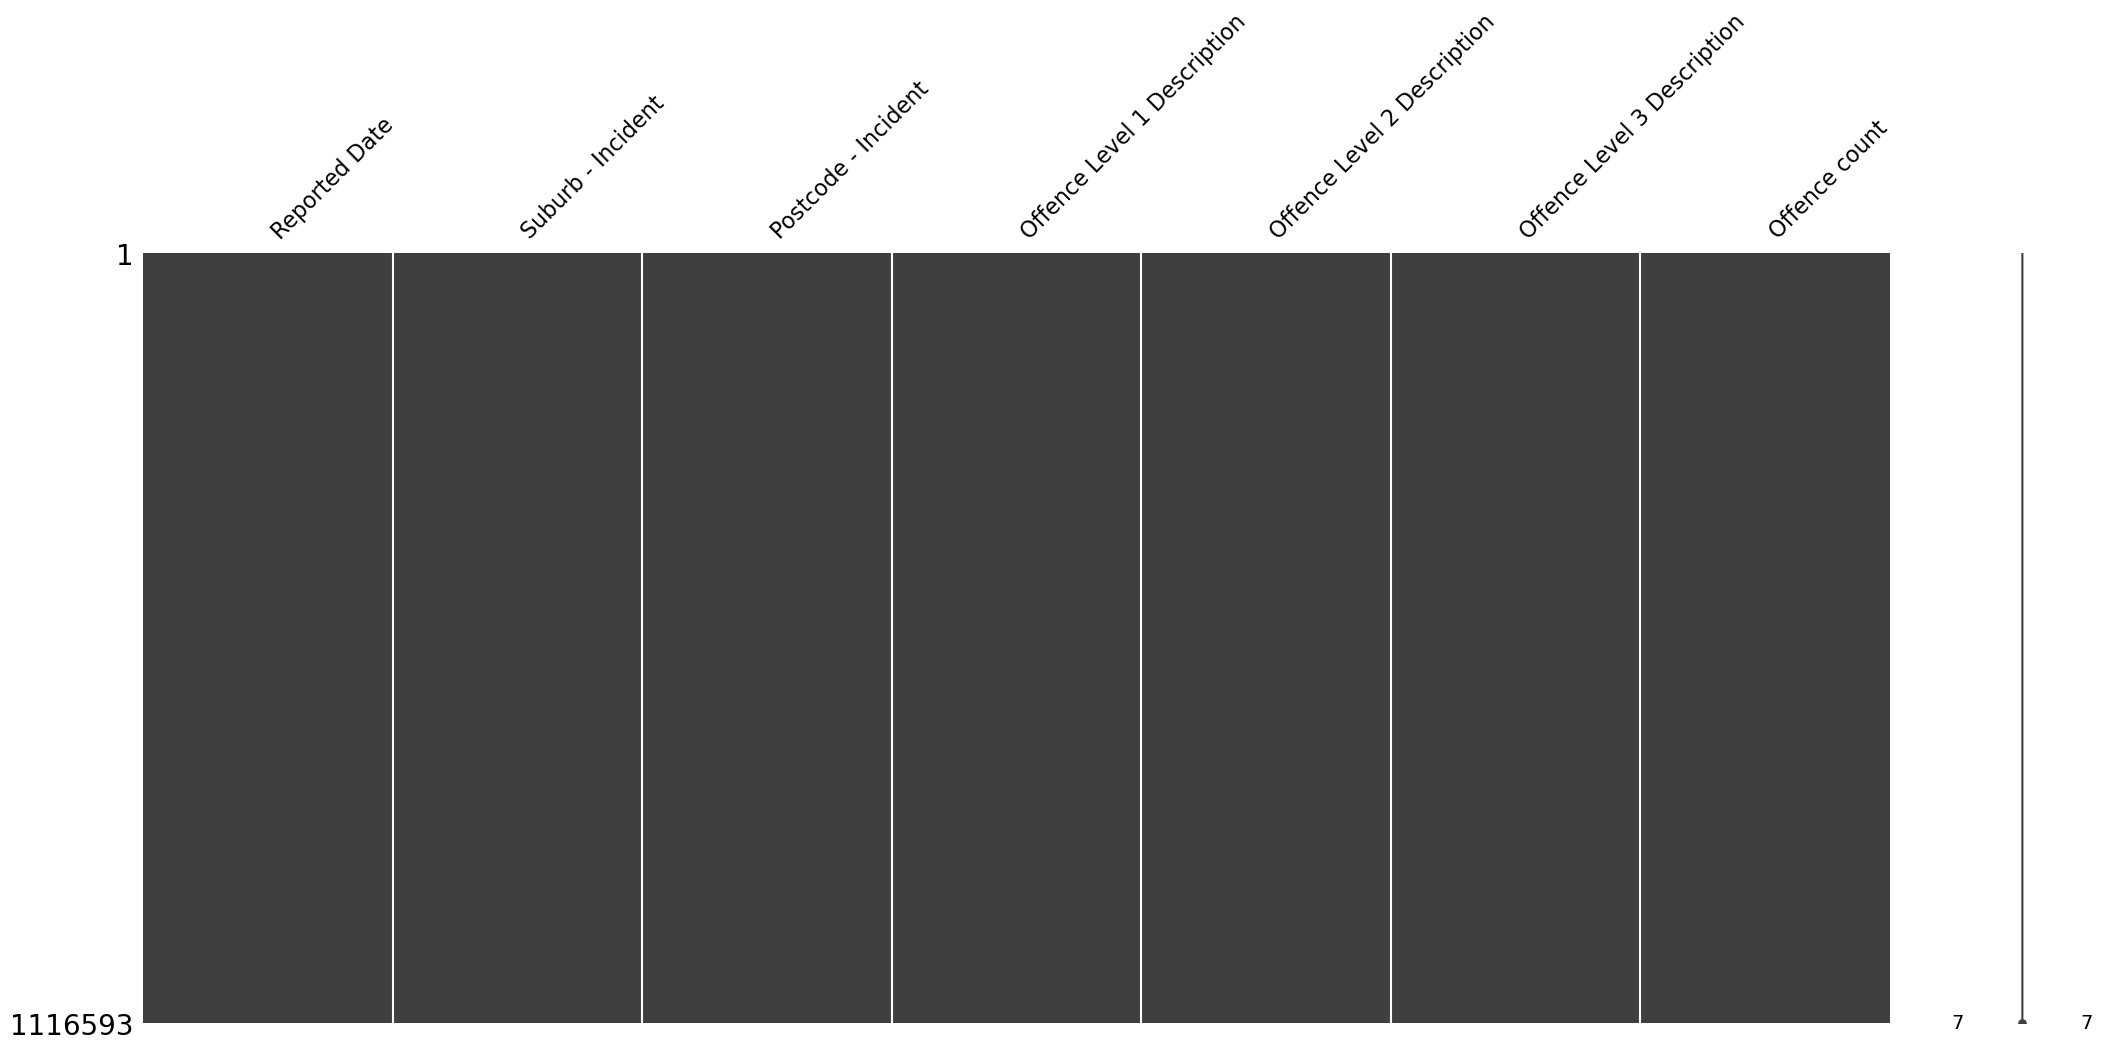

In [43]:
msno.matrix(df_crime_rate);

In [47]:
df_crime_rate.to_parquet('data/crime_rate_2010_2021.parquet', engine='fastparquet', compression='UNCOMPRESSED')

In [147]:
# import pandas
import pandas as pd
# import sweetviz
import sweetviz as sv
# load the parquet on the google drive into a dataframe
df = pd.read_parquet("data\crime_rate_2010_2021.parquet")

In [148]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1116593 entries, 0 to 1116592
Data columns (total 7 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   Reported Date                1116593 non-null  object 
 1   Suburb - Incident            1116593 non-null  object 
 2   Postcode - Incident          1116593 non-null  object 
 3   Offence Level 1 Description  1116593 non-null  object 
 4   Offence Level 2 Description  1116593 non-null  object 
 5   Offence Level 3 Description  1116593 non-null  object 
 6   Offence count                1116593 non-null  float64
dtypes: float64(1), object(6)
memory usage: 59.6+ MB


In [149]:
df.columns

Index(['Reported Date', 'Suburb - Incident', 'Postcode - Incident',
       'Offence Level 1 Description', 'Offence Level 2 Description',
       'Offence Level 3 Description', 'Offence count'],
      dtype='object')

In [150]:
df.columns= df.columns.str.lower()
df.columns = df.columns.str.replace(' - ', '_')
df.columns = df.columns.str.replace(' ', '_')
df.columns

Index(['reported_date', 'suburb_incident', 'postcode_incident',
       'offence_level_1_description', 'offence_level_2_description',
       'offence_level_3_description', 'offence_count'],
      dtype='object')

In [151]:
df['reported_date'] = pd.to_datetime(df['reported_date'], format='%d/%m/%Y')
df['offence_count'] = df['offence_count'].astype('int')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1116593 entries, 0 to 1116592
Data columns (total 7 columns):
 #   Column                       Non-Null Count    Dtype         
---  ------                       --------------    -----         
 0   reported_date                1116593 non-null  datetime64[ns]
 1   suburb_incident              1116593 non-null  object        
 2   postcode_incident            1116593 non-null  object        
 3   offence_level_1_description  1116593 non-null  object        
 4   offence_level_2_description  1116593 non-null  object        
 5   offence_level_3_description  1116593 non-null  object        
 6   offence_count                1116593 non-null  int32         
dtypes: datetime64[ns](1), int32(1), object(5)
memory usage: 55.4+ MB


In [152]:
for column in df.columns:
    print(column + ' : ' + str(len(df[column].unique())))
    if(len(df[column].unique()) < 100):
        print(column + ' : ' + str(df[column].unique()))
    print('\n')

reported_date : 4383


suburb_incident : 1746


postcode_incident : 447


offence_level_1_description : 2
offence_level_1_description : ['OFFENCES AGAINST PROPERTY' 'OFFENCES AGAINST THE PERSON']


offence_level_2_description : 9
offence_level_2_description : ['FRAUD DECEPTION AND RELATED OFFENCES'
 'PROPERTY DAMAGE AND ENVIRONMENTAL' 'SERIOUS CRIMINAL TRESPASS'
 'THEFT AND RELATED OFFENCES' 'ACTS INTENDED TO CAUSE INJURY'
 'ROBBERY AND RELATED OFFENCES' 'SEXUAL ASSAULT AND RELATED OFFENCES'
 'OTHER OFFENCES AGAINST THE PERSON' 'HOMICIDE AND RELATED OFFENCES']


offence_level_3_description : 29
offence_level_3_description : ['Obtain benefit by deception' 'Other property damage and environmental'
 'SCT - Non Residence' 'Other theft' 'Theft from shop' 'Common Assault'
 'Property damage by fire or explosion'
 'Serious Assault resulting in injury' 'SCT - Residence'
 'Theft from motor vehicle' 'Other unlawful entry with intent'
 'Theft/Illegal Use of MV' 'Serious Assault not resulting in in

In [128]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1116593 entries, 0 to 1116592
Data columns (total 7 columns):
 #   Column                       Non-Null Count    Dtype         
---  ------                       --------------    -----         
 0   reported_date                1116593 non-null  datetime64[ns]
 1   suburb_incident              1116593 non-null  object        
 2   postcode_incident            1116593 non-null  object        
 3   offence_level_1_description  1116593 non-null  object        
 4   offence_level_2_description  1116593 non-null  object        
 5   offence_level_3_description  1116593 non-null  object        
 6   offence_count                1116593 non-null  int32         
dtypes: datetime64[ns](1), int32(1), object(5)
memory usage: 55.4+ MB


In [158]:
df['month'] = df['reported_date'].apply(lambda x:x.month)
df['month'] = pd.to_datetime(df['month'], format='%m').dt.month_name().str.slice(stop=3)

In [161]:
df['year'] = df['reported_date'].apply(lambda x:x.year)
# df['month'] = pd.to_datetime(df['month'], format='%m').dt.month_name().str.slice(stop=3)

In [162]:
df

,reported_date,suburb_incident,postcode_incident,offence_level_1_description,offence_level_2_description,offence_level_3_description,offence_count,month,year
0,2010-07-01,ADELAIDE,5000,OFFENCES AGAINST PROPERTY,FRAUD DECEPTION AND RELATED OFFENCES,Obtain benefit by deception,2,Jul,2010
1,2010-07-01,ADELAIDE,5000,OFFENCES AGAINST PROPERTY,PROPERTY DAMAGE AND ENVIRONMENTAL,Other property damage and environmental,2,Jul,2010
2,2010-07-01,ADELAIDE,5000,OFFENCES AGAINST PROPERTY,SERIOUS CRIMINAL TRESPASS,SCT - Non Residence,1,Jul,2010
3,2010-07-01,ADELAIDE,5000,OFFENCES AGAINST PROPERTY,THEFT AND RELATED OFFENCES,Other theft,6,Jul,2010
4,2010-07-01,ADELAIDE,5000,OFFENCES AGAINST PROPERTY,THEFT AND RELATED OFFENCES,Theft from shop,3,Jul,2010
...,...,...,...,...,...,...,...,...,...
1116588,2022-06-30,WHYALLA STUART,5608,OFFENCES AGAINST PROPERTY,SERIOUS CRIMINAL TRESPASS,Other unlawful entry with intent,1,Jun,2022
1116589,2022-06-30,WILLASTON,5118,OFFENCES AGAINST PROPERTY,PROPERTY DAMAGE AND ENVIRONMENTAL,Other property damage and environmental,1,Jun,2022
1116590,2022-06-30,WILLASTON,5118,OFFENCES AGAINST THE PERSON,ACTS INTENDED TO CAUSE INJURY,Serious Assault resulting in injury,1,Jun,2022
1116591,2022-06-30,WOODCROFT,5162,OFFENCES AGAINST PROPERTY,THEFT AND RELATED OFFENCES,Theft from motor vehicle,1,Jun,2022


In [163]:
# produce the sweetviz report
report = sv.analyze(df)
report.show_html()

c:\Users\kmedr\anaconda3\envs\omdenaMUV\lib\site-packages\sweetviz\dataframe_report.py:74: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  all_source_names = [cur_name for cur_name, cur_series in source_df.iteritems()]
c:\Users\kmedr\anaconda3\envs\omdenaMUV\lib\site-packages\sweetviz\dataframe_report.py:109: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  filtered_series_names_in_source = [cur_name for cur_name, cur_series in source_df.iteritems()


                                             |          | [  0%]   00:00 -> (? left)

c:\Users\kmedr\anaconda3\envs\omdenaMUV\lib\site-packages\sweetviz\series_analyzer_text.py:19: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for item in to_process.source_counts["value_counts_without_nan"].iteritems():
c:\Users\kmedr\anaconda3\envs\omdenaMUV\lib\site-packages\sweetviz\series_analyzer_text.py:19: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for item in to_process.source_counts["value_counts_without_nan"].iteritems():
c:\Users\kmedr\anaconda3\envs\omdenaMUV\lib\site-packages\sweetviz\series_analyzer_text.py:19: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for item in to_process.source_counts["value_counts_without_nan"].iteritems():
c:\Users\kmedr\anaconda3\envs\omdenaMUV\lib\site-packages\sweetviz\series_analyzer_cat.py:28: FutureWarning: iteritems is deprecated and will be removed in a future version. U

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.
